In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc



In [27]:
df=pd.read_csv("loan_data.csv")

In [28]:
df.shape

(45000, 14)

In [29]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [30]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [31]:
missing_values = df.isnull().sum()
print(missing_values)

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [32]:
to_drop=df.duplicated().sum()
to_drop

np.int64(0)

In [33]:
skewss=df.select_dtypes(include='number').skew()
skewss

person_age                     2.548154
person_income                 34.137583
person_emp_exp                 2.594917
loan_amnt                      1.179731
loan_int_rate                  0.213784
loan_percent_income            1.034512
cb_person_cred_hist_length     1.631720
credit_score                  -0.610261
loan_status                    1.336351
dtype: float64

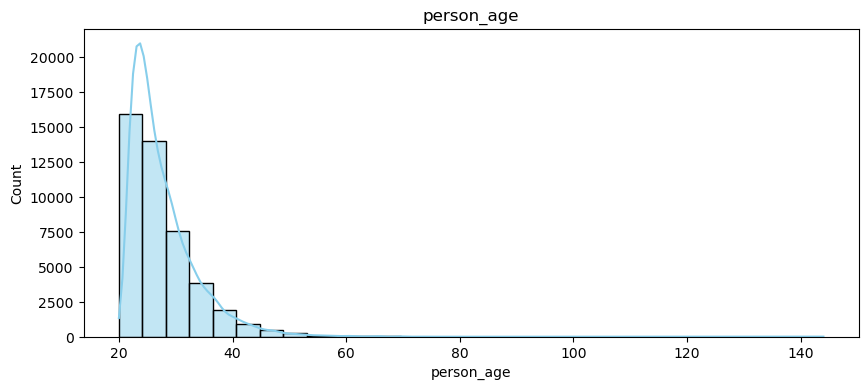

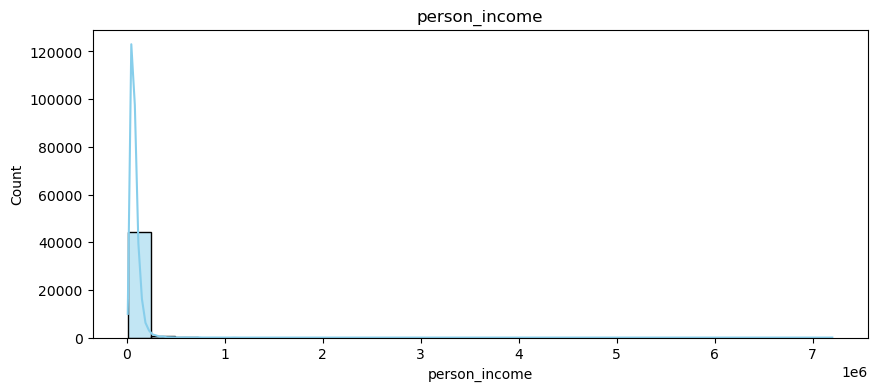

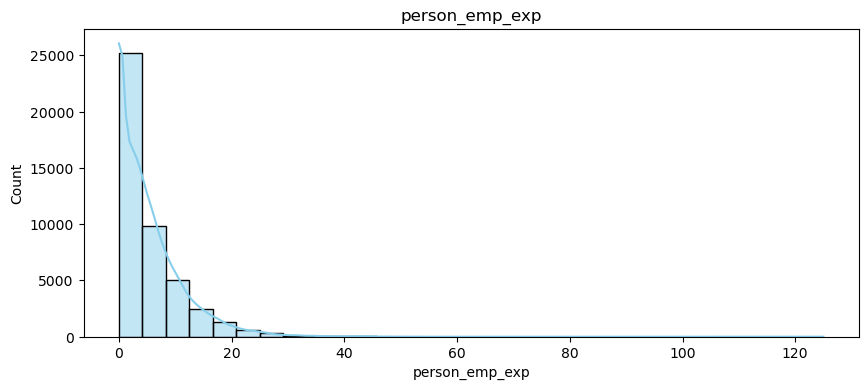

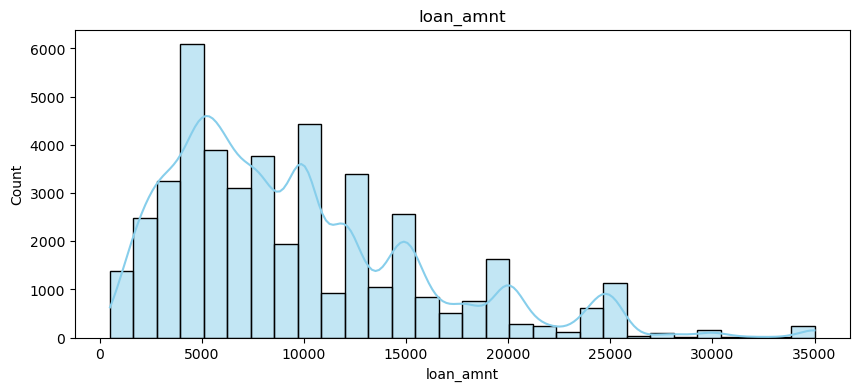

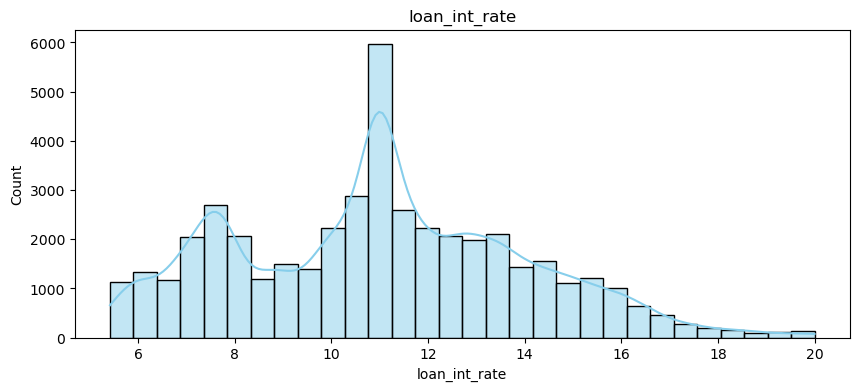

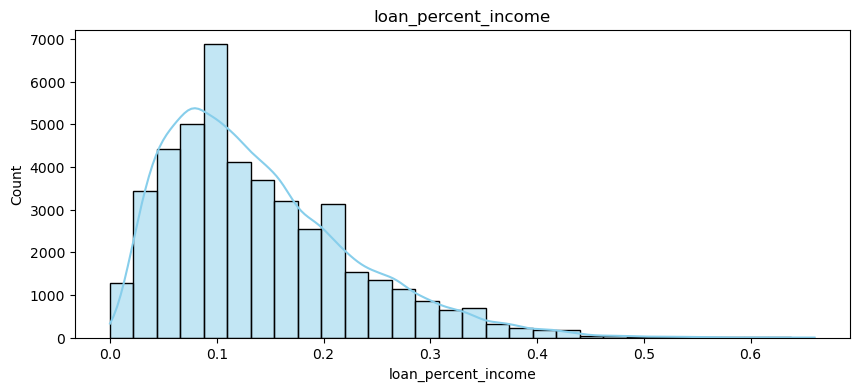

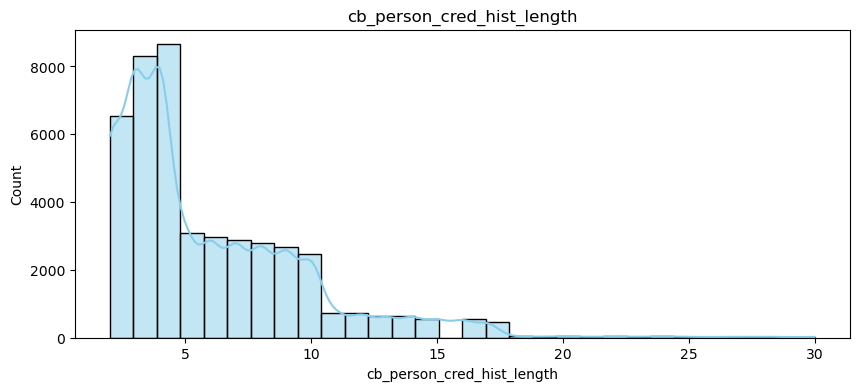

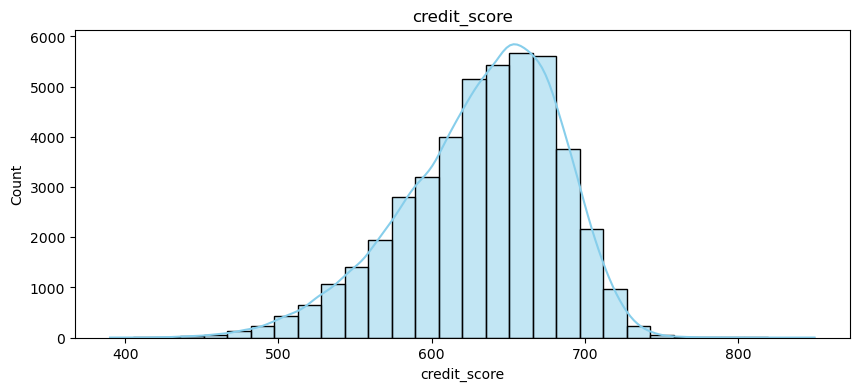

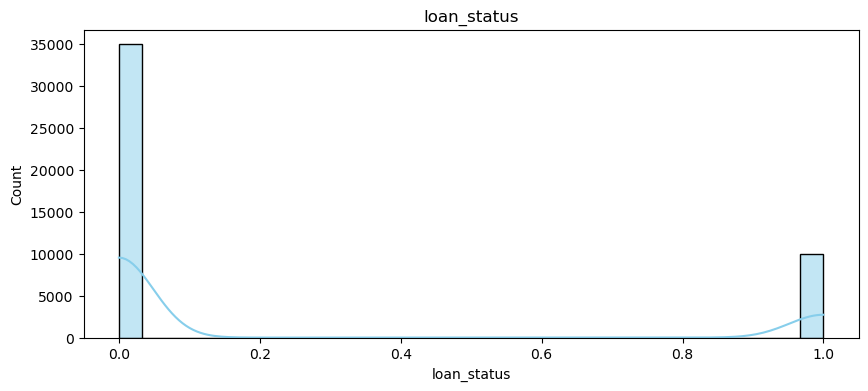

In [34]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(col)
    plt.show()


In [35]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df['person_income_yeojohnson'] = pt.fit_transform(df[['person_income']])

df = df.drop(columns=['person_income'])


In [36]:
skew=df['person_income_yeojohnson'].skew()
skew

np.float64(-0.01789496390136568)

In [37]:
corr=df.select_dtypes(include='number').corr()

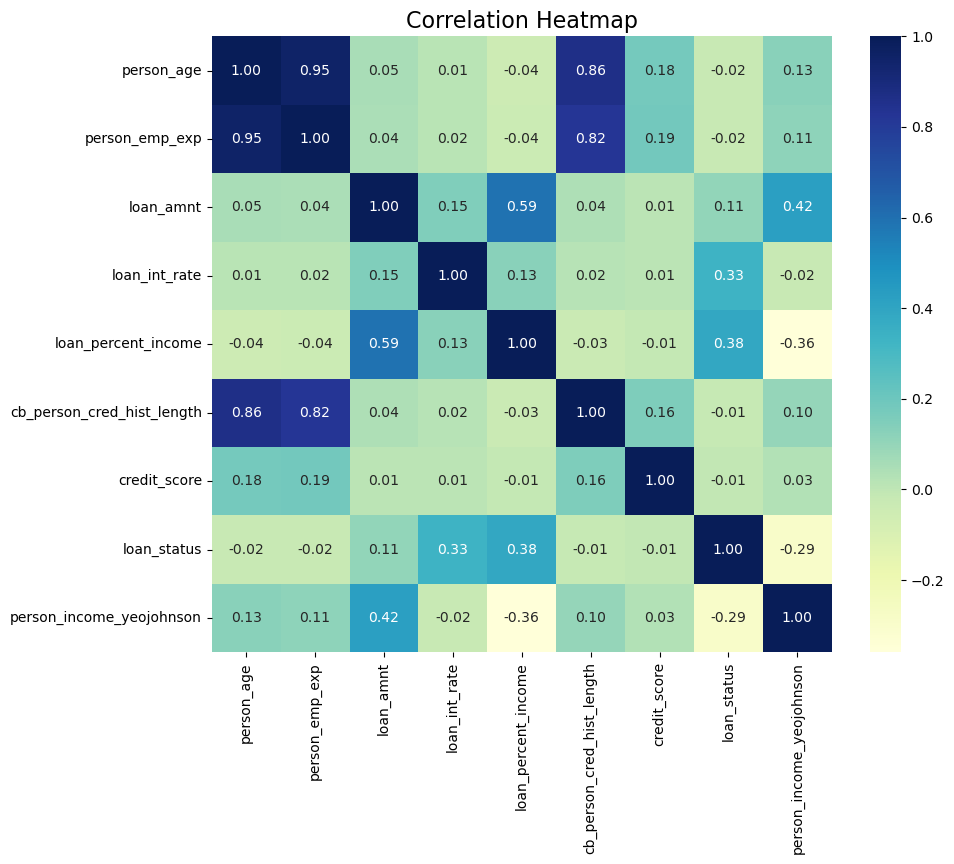

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='YlGnBu', cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [39]:
objects=df.select_dtypes(include='object').columns
objects

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [40]:
df= pd.get_dummies(df, columns=df.select_dtypes(include='object').columns, drop_first=False)
pd.set_option('display.max_columns', None)
df.head()

,person_age,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_income_yeojohnson,person_gender_female,person_gender_male,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,22.0,0,35000.0,16.02,0.49,3.0,561,1,0.135340,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False
1,21.0,0,1000.0,11.14,0.08,2.0,504,0,-3.296336,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True
2,25.0,3,5500.0,12.87,0.44,3.0,635,1,-3.269820,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False
3,23.0,0,35000.0,15.23,0.44,2.0,675,1,0.318700,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False
4,24.0,1,35000.0,14.27,0.53,4.0,586,1,-0.015934,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False


In [41]:
X = df.drop(columns=['loan_status']) 
y = df['loan_status'] 

In [42]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: loan_status
0    28000
1     8000
Name: count, dtype: int64
After SMOTE: loan_status
0    28000
1    28000
Name: count, dtype: int64


In [43]:
rf_model = RandomForestClassifier(
    n_estimators=200,       
    max_depth=None,         
    min_samples_split=2,    
    random_state=42,
    n_jobs=-1               
)

In [44]:
rf_model.fit(X_train_res, y_train_res)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1] 

In [46]:
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9238
ROC-AUC: 0.972

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      7000
           1       0.84      0.82      0.83      2000

    accuracy                           0.92      9000
   macro avg       0.89      0.89      0.89      9000
weighted avg       0.92      0.92      0.92      9000



<Axes: >

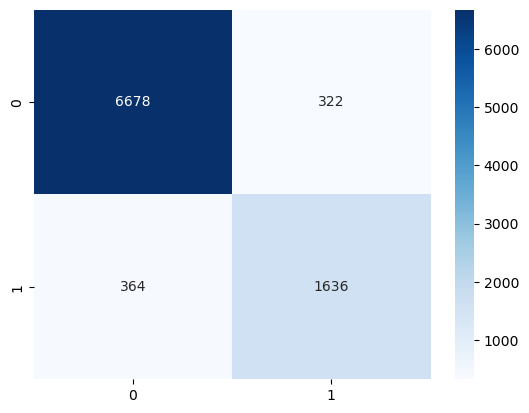

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")


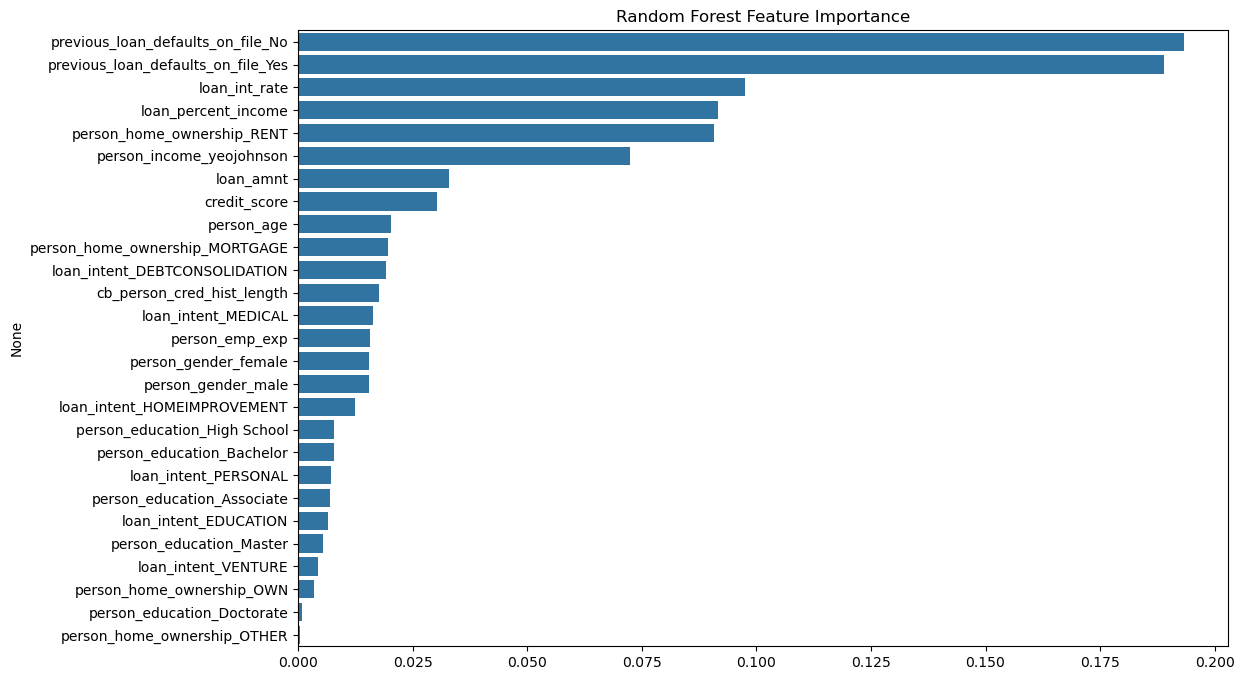

In [48]:
feature_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_imp.values, y=feature_imp.index)
plt.title("Random Forest Feature Importance")
plt.show()

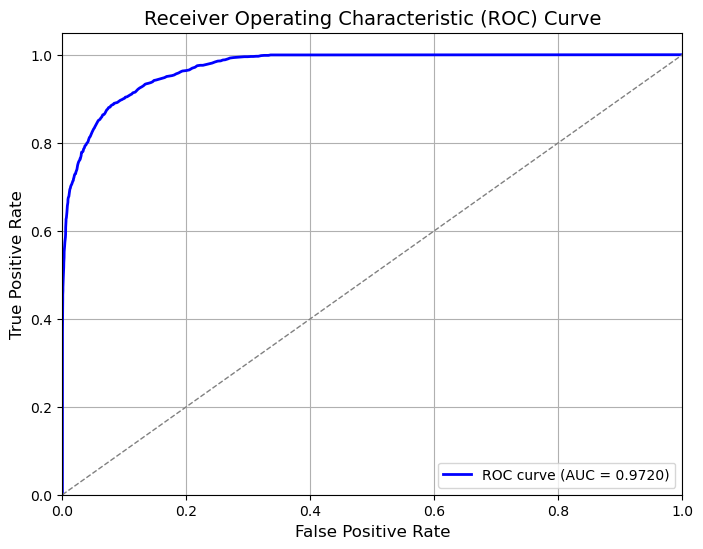

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [50]:
import joblib

joblib.dump(pt, "yeojohnson_transformer.joblib", compress=3)

joblib.dump(rf_model, "random_forest_compressed.joblib", compress=3)


['random_forest_compressed.joblib']